In [1]:
import torch
import os
import pandas as pd
from pydub import AudioSegment
from os import listdir
from os.path import isfile, join
from aimpathy_constants import *
from scipy import signal
from scipy.io import wavfile
import struct
from tqdm import tqdm
from torchaudio import transforms
import torchaudio

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
AUDIO_FOLDER = "C:\\Users\\amity\\PycharmProjects\\aimpathy\\data\\PMEmo\\PMEmo2019\\chorus"
THAYER_ANOTATIONS_CSV = "C:\\Users\\amity\\PycharmProjects\\aimpathy\\data\\PMEmo\\PMEmo2019\\annotations\\dynamic_annotations.csv"
thayer_annotations_df = pd.read_csv(THAYER_ANOTATIONS_CSV)

In [ ]:
audio_files = [f for f in listdir(AUDIO_FOLDER) if isfile(join(AUDIO_FOLDER, f))]

In [ ]:
audio_data = dict()
torch_spectorgrams = dict()
spectorgrammer = transforms.Spectrogram(n_fft=800)

In [ ]:
for audio_file in tqdm(audio_files, total=len(audio_files)):
    try:
        sound = AudioSegment.from_mp3(join(AUDIO_FOLDER, audio_file)).set_channels(1)
        audio_file_wave = sound.export(format="wav", bitrate=RATE)
        torch_spectorgrams[audio_file] = spectorgrammer(audio_file_wave)
        sample_rate, samples = wavfile.read(audio_file_wave)
        audio_data[audio_file] = samples
        audio_file_wave.close()
    except Exception as e:
        print(f"Failed reading {audio_file}")

In [ ]:
samples_data = np.array(struct.unpack('%dh' % (len(audio_data['6.mp3'])), audio_data['6.mp3']))

In [ ]:
f, t, Sxx = signal.spectrogram(samples_data, sample_rate, scaling="spectrum", nperseg=FFT_POINTS)

In [ ]:
t

In [ ]:
thayer_annotations_df.iloc[180:200]

In [69]:
spectorgrammer = transforms.Spectrogram(n_fft=800, power=2.0)
sample_file = os.sep.join([AUDIO_FOLDER, "10.mp3"])
wav_sample_file = os.sep.join([AUDIO_FOLDER, "10.wav"])

In [4]:
sound = AudioSegment.from_mp3(sample_file).set_channels(1)
sound.export(os.sep.join([AUDIO_FOLDER, "10.wav"]), format="wav", bitrate=RATE)

<_io.BufferedRandom name='C:\\Users\\amity\\PycharmProjects\\aimpathy\\data\\PMEmo\\PMEmo2019\\chorus\\10.wav'>

In [5]:
sound = AudioSegment.from_mp3(sample_file).set_channels(1)
audio_file_wave = sound.export(format="wav", bitrate=RATE)
sample_rate, samples = wavfile.read(audio_file_wave)
samples, sample_rate

(array([  0,   0,   0, ..., 434, 432, 118], dtype=int16), 44100)

In [7]:
waveform, sample_rate = torchaudio.load(wav_sample_file, format="wav", normalize=True)
waveform, sample_rate

(tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0132, 0.0132, 0.0036]]), 44100)

In [37]:
torch.from_numpy(samples/(2**15)).reshape((1, -1))

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0132, 0.0132, 0.0036]],
       dtype=torch.float64)

In [75]:
waveform.mean()

tensor(-4.4020e-05)

In [84]:
spectorgrammer = transforms.Spectrogram(n_fft=800, power=2.0, normalized=True)

In [85]:
test_spectogram = spectorgrammer(torch.from_numpy(samples/(2**15)).reshape((1, -1)))

In [88]:
test_spectogram.mean()

tensor(0.0856, dtype=torch.float64)

In [52]:
import matplotlib.pyplot as plt
import librosa

In [66]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None, ymax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    if ymax:
        axs.set_ylim((0, ymax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

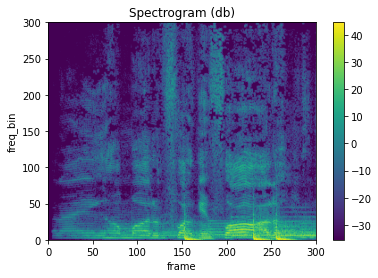

In [68]:
plot_spectrogram(torch.abs(test_spectogram[0]), xmax=300, ymax=300)